# ARIMA & Seasonal ARIMA

In [72]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm
%matplotlib inline

In [49]:
# Current Working Directory
cwd = os.getcwd()

# Parent Directory
parent = os.path.dirname(cwd)

# Data Directory
data = os.path.join(parent, 'Database/perrin-freres-monthly-champagne.csv')

# Print Directories
print(cwd)
print(parent)
print(data)

/workspaces/monthly-sales-forecasting/Notebooks
/workspaces/monthly-sales-forecasting
/workspaces/monthly-sales-forecasting/Database/perrin-freres-monthly-champagne.csv


In [50]:
# Load Data to a DataFrame
df = pd.read_csv(data)

# Display Data
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [51]:
# Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [52]:
# Set the Column name as Sales for "PePerrin Freres monthly champagne sales millions ?64-?72"
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [53]:
# Drop "NaN" Values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [54]:
# Convert Month to Datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [55]:
# Describe Data
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

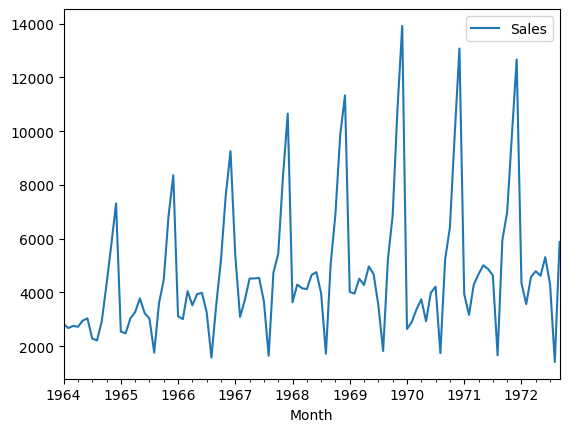

In [56]:
# Plot Data
df.plot()

## Testing for Stationary

In [57]:
# Test Stationarity
test_result = adfuller(df['Sales'])

In [58]:
# Hypothesis Testing
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [59]:
# Test
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### Defferencing

In [60]:
# Sales First Difference
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [61]:
# Sales First Difference Shift 12
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(12)

In [62]:
# First 14 Rows
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


### Again ADF Testing

In [63]:
# Test for Seasonal First Difference
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

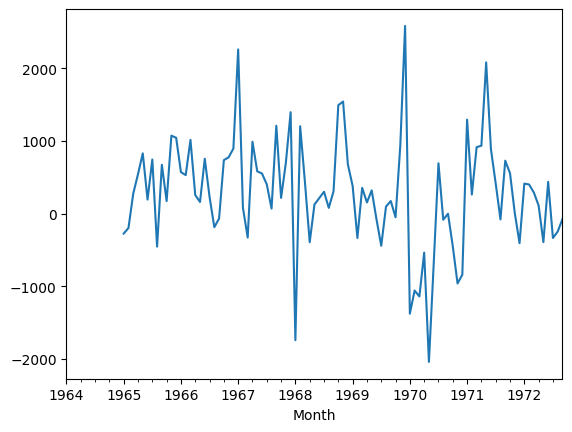

In [64]:
# Plot Seasonal First Difference
df['Seasonal First Difference'].plot()

## Auto Regressive Model

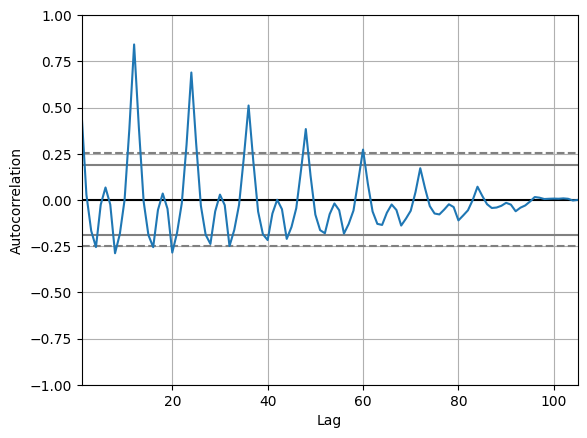

In [65]:
# Plot the Sales Autocorrelation
autocorrelation_plot(df['Sales'])
plt.show()

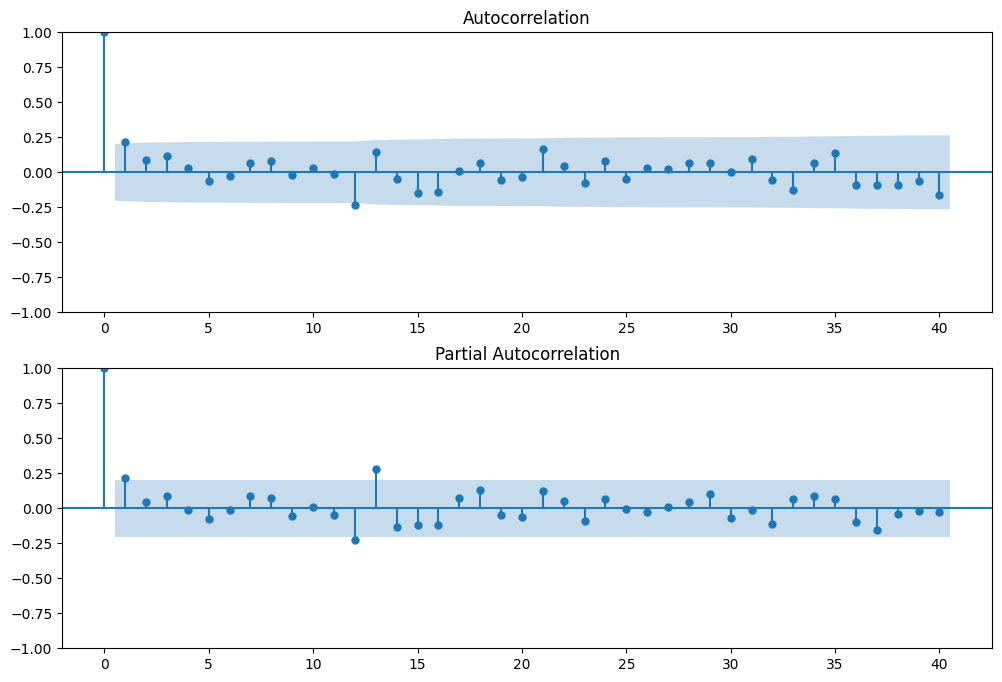

In [66]:
# Plot the ACF and PACF with Subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df['Seasonal First Difference'].dropna(), lags = 40, ax=ax[0])
plot_pacf(df['Seasonal First Difference'].dropna(), lags = 40, ax=ax[1])

plt.show()

In [69]:
### For Non-Seasonal Data
# p = 1, d = 1, q = 0 or 1
model = ARIMA(df['Sales'], order=(1, 1, 1))
model_fit = model.fit()

/workspaces/monthly-sales-forecasting/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/monthly-sales-forecasting/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/monthly-sales-forecasting/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [70]:
# Summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Wed, 29 Jan 2025   AIC                           1911.627
Time:                        14:41:31   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.000      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.319      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# Forecast
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

/workspaces/monthly-sales-forecasting/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/workspaces/monthly-sales-forecasting/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

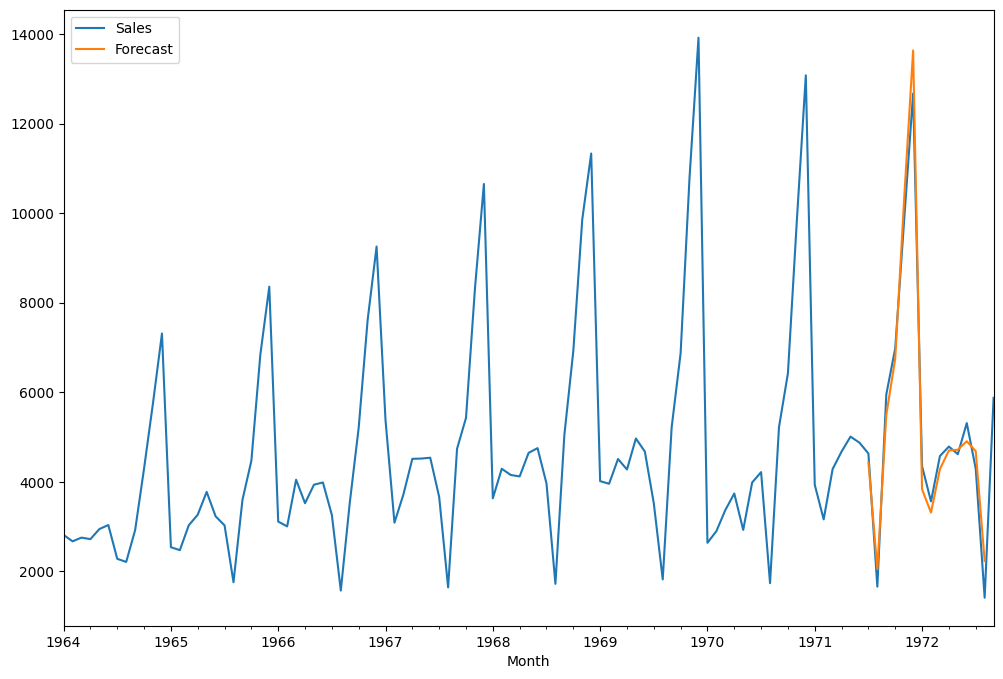

In [75]:
# Plot
df ['Forecast'] = results.predict (start=90, end=103, dynamic=True)
df [['Sales', 'Forecast']].plot(figsize=(12, 8))